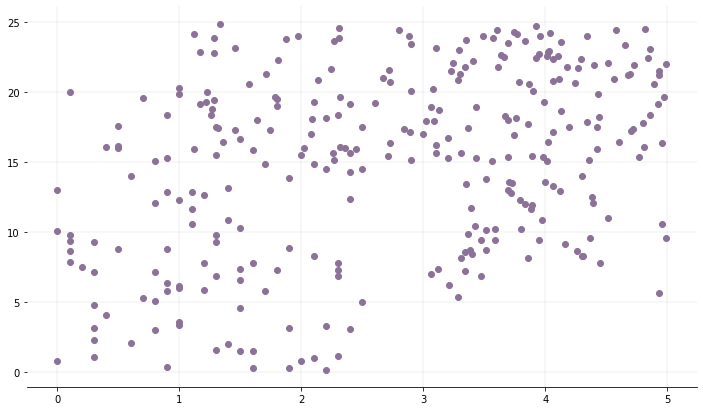

In [50]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(15, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

# Generate dataset
size = 100
dataset = generate_random_dataset(size)
# dataset = pd.DataFrame([[4, 20, 0], [1, 5, 1]], columns=['x', 'y', 'target']).append(dataset)

features = dataset[['x', 'y']]
label = dataset['target']
# Hold out 20% of the dataset for training
test_size = int(np.round(size * 0.2, 0))
# Split dataset into training and testing sets
x_train = features.values
y_train = label.values
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features['x'], features['y'], color="#8C7298")
plt.show()

In [51]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

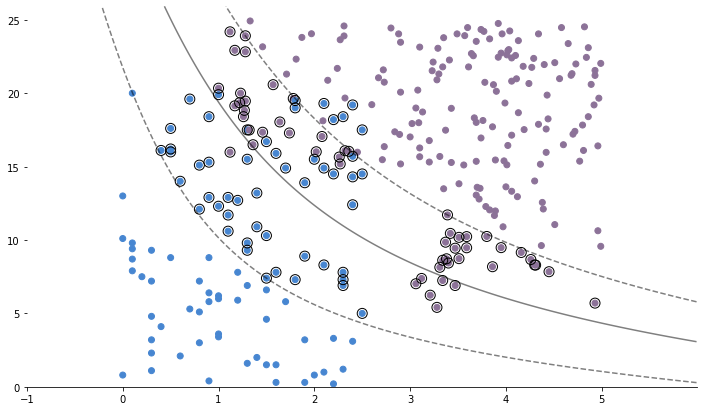

In [52]:
fig, ax = plt.subplots(figsize=(12, 7))
# Removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features['x'])
# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(features['x'], features['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score
import numpy as np
mask = np.ones(len(x_train), bool)
mask[model.support_] = 0
x_train2 = x_train[mask]
y_train2 = y_train[mask]

model2 = svm.SVC(kernel='poly', degree=2)
model2.fit(x_train2, y_train2)
y_pred = model2.predict(x_train2)
accuracy_score(y_train2, y_pred)

0.9949238578680203

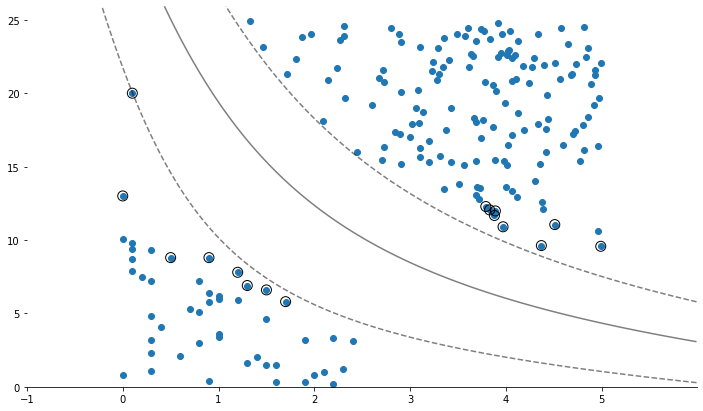

In [54]:
fig, ax = plt.subplots(figsize=(12, 7))
aux = features.loc[features.index.difference(model.support_), :]
# Removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train2))
yy = np.linspace(0, max(features['y']) + 1, len(y_train2))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features['x'])
# Assigning different colors to the classes
colors = y_train2
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(aux['x'], aux['y'])
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()